# Linear Regression with Scikit-Learn

# Setup

In [243]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import (model_selection,linear_model,metrics)

# Implementation of Simple Linear Regression

In [244]:
# Loading the Dataset
house_prices = pd.read_csv("homeprices (2).csv")

# Checking the first 5 rows of the dataset
house_prices.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [245]:
# Checking the Info the dataset
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


# Visulization of the Graphs

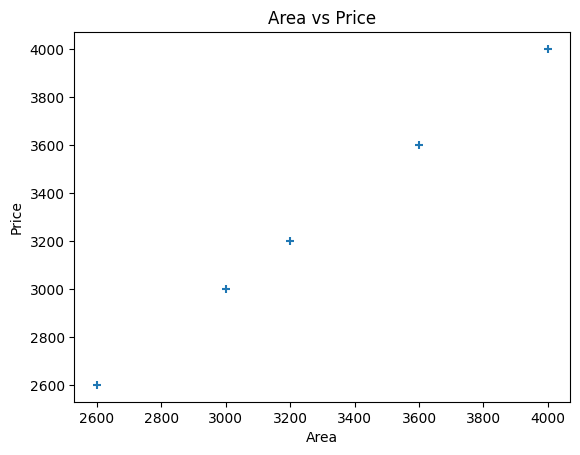

In [246]:
# using the matplotlib 
plt.scatter(house_prices['area'],house_prices['area'],marker='+', )
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.show()

In [247]:
# Building the linear regression model
model = linear_model.LinearRegression()
X = house_prices[['area']]
y = house_prices['price']
model.fit(X,y)

# Predciting the price using the model
predicted_price = model.predict(X)
predicted_price

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

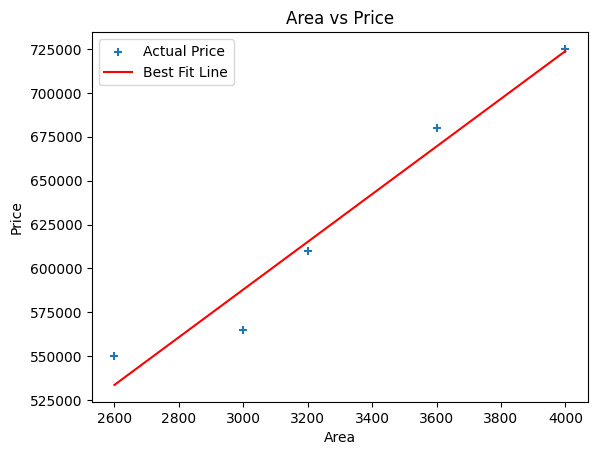

In [248]:
# Drawing the regression line using matplotlib
plt.scatter(house_prices['area'],house_prices['price'],marker='+',label='Actual Price')
plt.plot(house_prices['area'],predicted_price,color='red',label='Best Fit Line')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.legend()
plt.show()

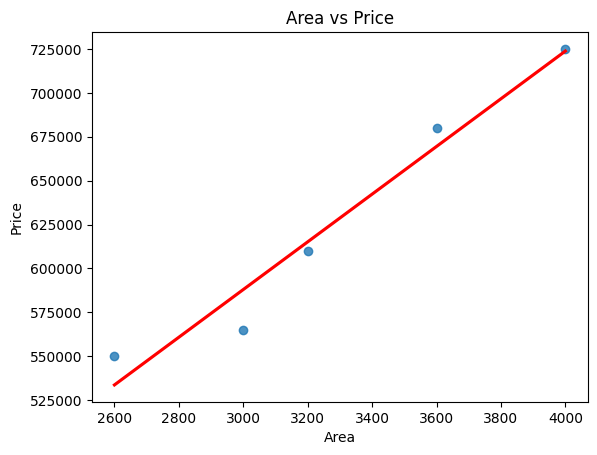

In [249]:
sns.regplot(x=house_prices['area'], y=house_prices['price'], ci=None, line_kws={"color": "red"})
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.show()


# Evaluating of the model using r2

In [250]:
model.score(X,y)

0.9584301138199486

# ols Summary

In [251]:
import statsmodels.api as sm

x = sm.add_constant(X)

ols =sm.OLS(y,x).fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     69.17
Date:                Sat, 12 Apr 2025   Prob (F-statistic):            0.00364
Time:                        17:20:36   Log-Likelihood:                -54.709
No. Observations:                   5   AIC:                             113.4
Df Residuals:                       3   BIC:                             112.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.806e+05   5.41e+04      3.337      0.0

# Example 2 

In [252]:
# immorting the dataset
adv  = pd.read_csv("tvmarketing (1).csv")

# Checking the first 5 rows of the dataset
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [253]:
# Chceking the info of the dataset
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [254]:
# Chceking the statistics of the dataset
adv.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


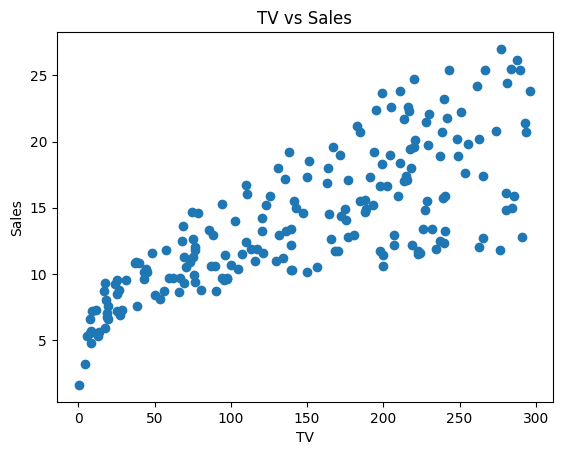

In [255]:
# Visulizing the dataset using matplotlib
plt.scatter(adv['TV'],adv['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()

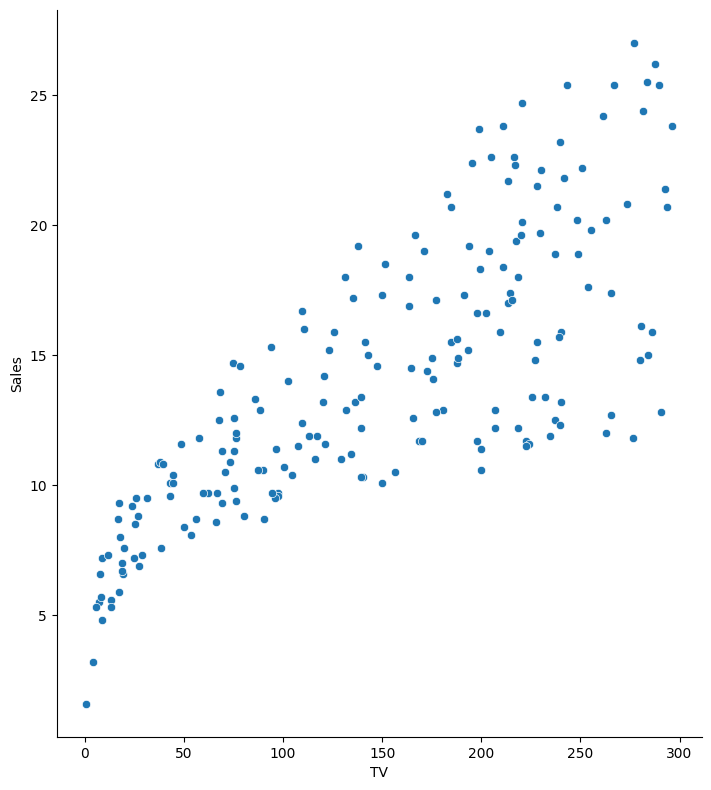

In [256]:
# using seaborn to visualize the dataset
sns.pairplot(adv,x_vars=["TV"], y_vars=["Sales"],kind='scatter',aspect=0.9,size=8)

In [257]:
# Splitting the dataset into train and test
x = adv[['TV']]
y = adv['Sales']

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

# Print the Shape of the train and test dataset
print("Shape of Train dataset: ",X_train.shape,Y_train.shape)
print("Shape of Test dataset: ",X_test.shape,Y_test.shape)

Shape of Train dataset:  (160, 1) (160,)
Shape of Test dataset:  (40, 1) (40,)


In [258]:
# Changing the shape of Y_train and Y_test
Y_train =  Y_train.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)    

In [259]:
# Using the Cross Validation 

In [260]:
lr = linear_model.LinearRegression()
scores = model_selection.cross_val_score(lr,x,y,cv=5,scoring='r2')
scores.mean()

0.5926000843648255

In [261]:
# Buliding the model
lr = linear_model.LinearRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)

Evaluating the model using the score method

In [262]:
r2 = metrics.r2_score(Y_test,y_pred)
r2

0.6766954295627076

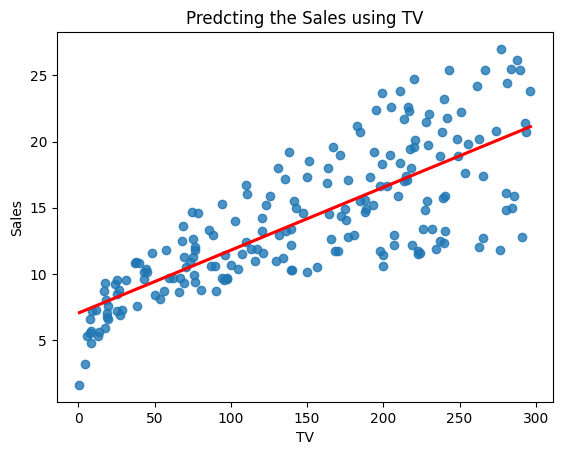

In [263]:
# Drawing the regression line using seaborn
sns.regplot(x=adv['TV'], y=adv['Sales'], ci=None, line_kws={"color": "red"})
plt.title('Predcting the Sales using TV')
plt.show()

In [264]:
import pandas as pd

# Create the data for the table
data = {
    "R²": ["High", "High", "Low", "Low"],
    "CV Error": ["Low", "High", "Low", "High"],
    "Interpretation": [
        "Good Generalization", 
        "Overfitting", 
        "Underfitting", 
        "Severe Underfitting"
    ],
    "Possible Issue": [
        "-", 
        "Model too complex", 
        "Model too simple", 
        "Model too simple, features not good"
    ],
    "Solution": [
        "No immediate action needed", 
        "Use regularization, simplify the model", 
        "Increase model complexity, add features", 
        "Increase model complexity, improve feature selection"
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the table
df


,R²,CV Error,Interpretation,Possible Issue,Solution
0,High,Low,Good Generalization,-,No immediate action needed
1,High,High,Overfitting,Model too complex,"Use regularization, simplify the model"
2,Low,Low,Underfitting,Model too simple,"Increase model complexity, add features"
3,Low,High,Severe Underfitting,"Model too simple, features not good","Increase model complexity, improve feature sel..."


# Example 3 Placement Data

In [265]:
# Laoding the Placement dataset
df = pd.read_csv(r'placement.csv')

# Looking the first 5 rows of the dataset
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [266]:
# Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


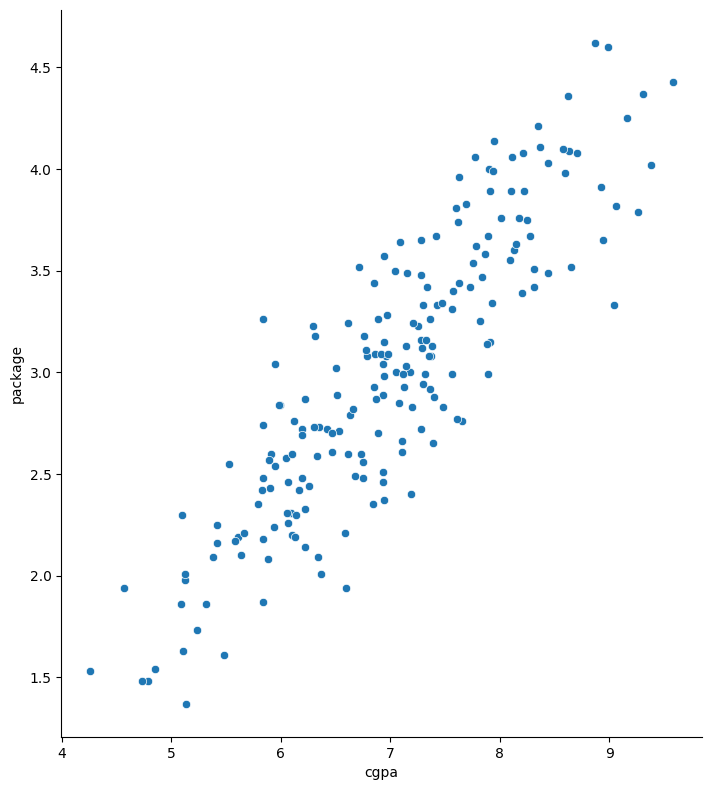

In [267]:
# Visualizing the dataset using seaborn
sns.pairplot(x_vars=['cgpa'],y_vars=['package'],data=df,kind='scatter',aspect=0.9,size=8)

In [268]:
x = df[['cgpa']]
y = df['package']

# Buliding and fitting the model
model1  = linear_model.LinearRegression()
model1.fit(x,y)

# Chceking the Accuracy of the model
model1.score(x,y)

0.7756192256051151

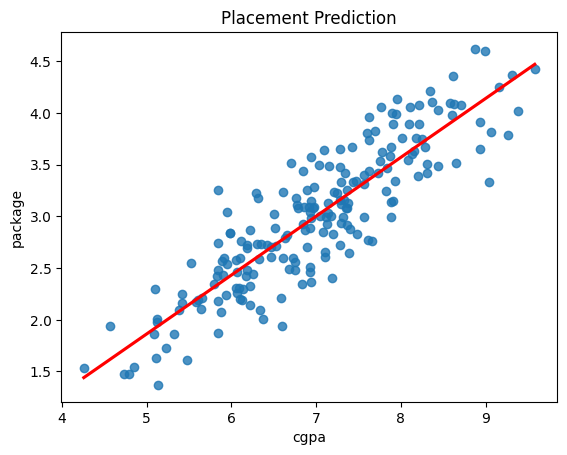

In [269]:
# Drawing the regression line using seaborn
sns.regplot(x=df['cgpa'], y=df['package'], ci=None, line_kws={"color": "red"})
plt.title('Placement Prediction')
plt.show()

Applying the Train-Test-Split

In [270]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(160, 1) (160,)
(40, 1) (40,)


In [271]:
Y_test = Y_test.values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)

In [272]:
# Cross Validiation
lin = linear_model.LinearRegression()
cv = model_selection.cross_val_score(lin,x,y,cv=5,scoring='r2')
cv.mean()

0.7582150904066857

In [273]:
# Fitting the model using the train dataset
lin.fit(X_train,Y_train)

LinearRegression()

In [274]:
lin.score(X_test,Y_test)

0.7730984312051673

# Using the Hypo Test 

In [275]:
X_train = sm.add_constant(X_train)
ols = sm.OLS(Y_train,X_train).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     546.8
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           3.56e-53
Time:                        17:20:39   Log-Likelihood:                -52.305
No. Observations:                 160   AIC:                             108.6
Df Residuals:                     158   BIC:                             114.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0270      0.174     -5.899      0.0